# Summarizing the size of cells

Joachim Goedhart

In [ ]:
### Load the required packages
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading the data from the Google sheet and cleaning it:

In [ ]:
### Read the data

df_sheet <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSc-nI1-s_u-XkNXEn_u2l6wkBafxJMHQ_Cd3kStrnToh7kawqjQU3y2l_1riLigKRkIqlNOqPrgkdW/pub?output=csv", na.strings = "")
df_sheet <- df_sheet %>% na.omit()

colnames(df_sheet) <- c("Timestamp", "Group", "Cell", "Nucleus")
df_tidy <-
    pivot_longer(
        df_sheet,
        cols = -c("Timestamp", "Group"),
        names_to = "Sample",
        values_to = "Size"
    ) %>% mutate(Size = gsub(" ", "", Size)) %>% separate_rows(Size, sep=",")

df_clean <- df_tidy %>% mutate(Size = as.numeric(Size)) %>% filter(Size>0 & Size<1000)


Warning in mask$eval_all_mutate(quo): NAs introduced by coercion

The tidy data sheet `df` is used as an input for the plot that shows the distribution:

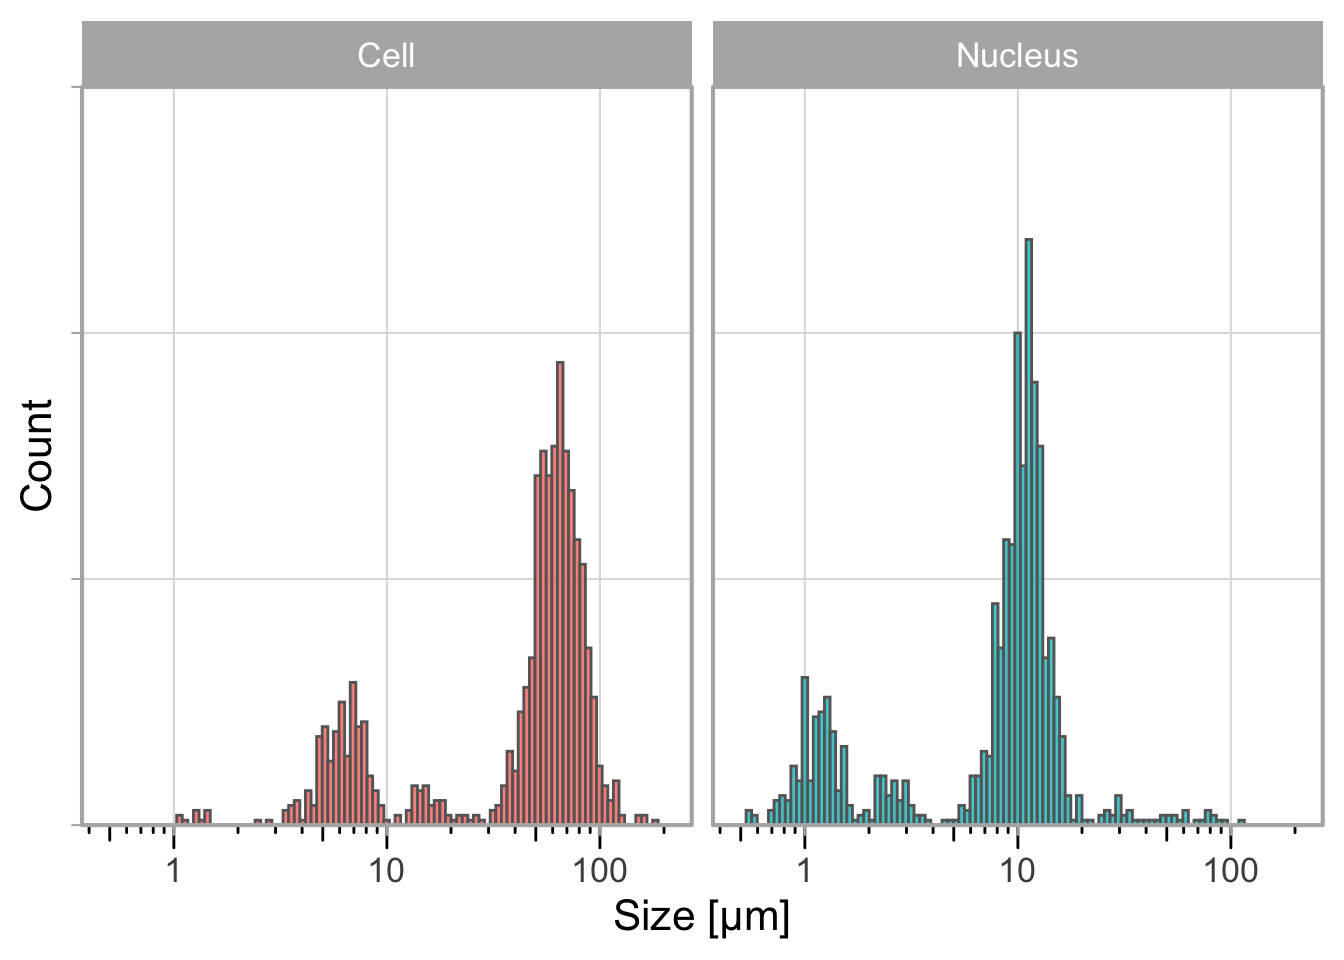

In [ ]:

ggplot(df, aes(x=Size, fill=Sample)) +
  
  geom_histogram(bins = 100, alpha=.8, color='grey40') +
  # scale_x_log10() +
  labs(y="Count", x="Size [µm]") +
  # coord_cartesian(xlim = c(0.5,120)) +
  theme_light(base_size = 16) + theme(axis.text.y = element_blank()) +
  facet_wrap(~Sample) +
  theme(legend.position = "none") +
  
  #Force the y-axis to start at zero
  scale_y_continuous(expand = c(0, NA), limits = c(0,150)) +
  #Apply a logarithmic scale to the x-axis and set the numbers for the scale
  scale_x_log10(breaks = c(1,10,100), limits = c(.5,200)) +
  #Remove minor gridlines
  theme(panel.grid.minor = element_blank()) +
  #Add ticks to the bottom, outside
  annotation_logticks(sides="b", outside = TRUE) +
  #Give a little more space to the log-ticks by adding margin to the top of the x-axis text
  theme(axis.text.x = element_text(margin = margin(t=8))) +
  #Needed to see the tcks outside the plot panel
  coord_cartesian(clip = "off")


The size data of the Cells is selected and used to plot the distributions as a violin plot per group. The median value is indicated as a black dot:

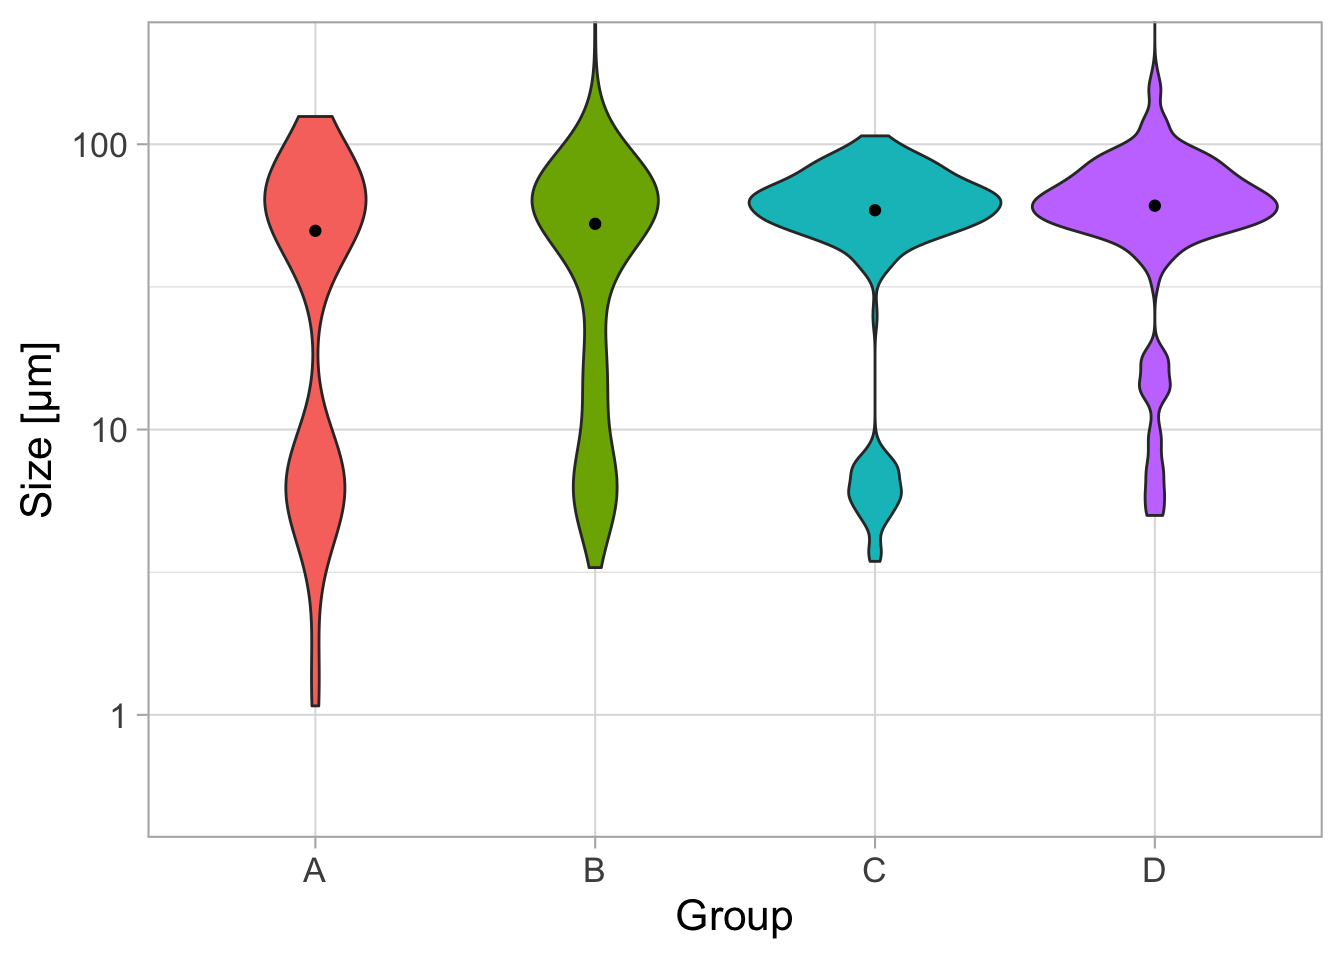

In [ ]:
df_cell <- df %>% filter(Sample =="Cell")

        p <- ggplot(df_cell, aes(x=Group, y=Size, fill=Group))

        p <- p + geom_violin() +  stat_summary(fun = median, geom = "point")
        
        p <- p + scale_y_log10()
        
        p <- p + labs(x="Group", y="Size [µm]")
        p <- p + coord_cartesian(ylim = c(0.5,200))
        
        p <- p + theme_light(base_size = 16)
        p <- p + theme(legend.position = "none")

p
